In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import alex_cifar10

branchyNet = alex_cifar10.get_network()
if cuda.available:
    branchyNet.to_gpu()
branchyNet.training()

Import Data

In [12]:
from datasets import pcifar10

x_train,y_train,x_test,y_test = pcifar10.get_data()
training_size=100
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train, y_train, x_test, y_test = x_train[:training_size*5], y_train[:training_size*5], x_test[:training_size], y_test[:training_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#training size = 5000, each epoch we need to 70 seconds.
#training size = 2500, each epoch we need at least 30 seconds.
#training size = 500, each epoch we need at least 6 seconds.
#this app can use 30 cores and at least 12GB memory for UTSA server when training size is 500 .

((50000, 3, 32, 32), (50000,), (10000, 3, 32, 32), (10000,))
((500, 3, 32, 32), (500,), (100, 3, 32, 32), (100,))


Settings

In [13]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [14]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

1620769657.69
[ 25 236 133 116 376 411 129 471 325 341 331 200 414 413 488 210 157 480
 358 240  44 253 303  72 270 305 293 207 450 271 335 140 377 441 367  42
  49 490 231 130 364 452 289 389 276 146  17 390  89  30 398 104 101  32
 370 449 298 174  79 192 473 123 460 327 423 437  41 282 167 403 110 263
 241 436 235 478 119   8 387   3 371 356  64 322 313 211  68 260 349 290
 184 237 359 205 245 254 334 444 152 256   0 362 175 451 339   1  86 239
  94 268 283 304  27 238   6 234   4 288 193 105 128 379  53 481 433 328
 340 286 417 218 266 242 373  36 213 158 106 366 179  70 318 372 384 448
  55 421 197   2 482 468 251 292 219 232 455 407 382  33 314 156 244 365
 344 301 259 419 121  31 190 227 470  57  67 250 215  38 230 275 491 294
 135  73 458  81 483 332  59  21  75 432  12 498 262 406 400 342 354 466
 329 118 217 355  80 426 198 456  29 464 472 115 291 493 112 147 243 267
 357 394 494 102 151 343 496  23 418 363 148 172 143 337 300 107 162   9
 401 302  35 297 338 136 316  40 485 

1620769689.56
[168 409 491 112 486 366 496  57 367  75 345  16 352 493 200  67 341 130
 492 270 150   3  93 339 118 251 425 415 389 349 170 144 113 346 468 128
   8 182  14 250 471  32  72 363 454 446 361 229 376 243 385 140 115  83
 307 174 444 177 326 176 195 226  70 308 400 362 479 234 256 383 225  95
 463 342 197 396 190  92  42 438 398 452 217  87 257 382  96 388 111 269
 453 312 239  17 329 103 406 403 207 434 274  49 278 248 373 163 450  11
 448 460 179 136  45  19 340 458   5 273  41   1 263 151  44 193 419 246
  81  74  36 327 302 135 497  13 109 161   0 292 141 331  10  37 498  89
  61 119 381  38 279 204 143 223 432 215 202 145 287 499 213 288 351  54
 153  31 477 210  21 158 267 164 117 325  12 440 297 314  68 301 476  58
 284 414 281 271  30 426 199 411 298 482  27 320 254  20 126  63 222 336
 441  33 244 475 324 264 129 258 123 358 300 219 245 133 186 233 357 155
  35  48 125  53 187 306 162 238 484 303 147 183  77 178 294   4 181 235
 259 191 429 481 240 421 393 368 431 

1620769720.24
[360 226 438 363 490 116 370 436 429 157 398 310 110 130 439 291 144 422
 284 309 221  45 362 469  91 413  90 482 140 440 248  11  54 271 447  44
  79 108 166 251 374 411  86 462 430 299 330 446 466 109 342  66 210 474
 477 289 420  67  26  10 186 344 354 266 112  48 337 312 458 114 242  75
   8  92 278 419 476 131 302 383 241 451  39 129 195  83 237 454 150  96
 442 229 206 261  98  15 409  23 134  37 135 201 385 414 279 328 218  19
 452  63 460 263 250  99 277 180 400 314 167 335   1 318   9 478 183  40
 333 486 380 455  78  58  55 234 494 373 358 253 171 276  42 181 389 275
 484 151 305 376 125 384 145 479 273  18 260 272 154 192 267 120 143 369
 319 412 489 179 146 268 450  93 256 393 214 372 311 207 238 240 485 107
  81 177  76 336 334 356 254 401  69 306 347 225 190 161 473 357 488 252
 111 115 122  31 375 290 405 269 113 461 366 352 191 209 465 423 169 320
 345 232 417 174  43 453 119  33 264 287 175  46 280 427 322 483 351 367
  88  41  20 326  12 392 172 459 173 

1620769750.77
[120 121 324 164 265 349 272 462 255 429 368 381 361 464 387 217 111 261
  59 178 326 104  21 406 470  58 388 366 484 208  69 171 410 383 411 299
 440 194 497  46 338 180 317 223  13 390  15 205 234 351 148 463   8 469
 446  68 204 450  98 456  93 177 319 275 156  56 432 229 460   3 211 436
 146 284 117 344 289 224 102 151   4 327 372 485 244  84 288 203 107 227
 100 345  28 237 181  61 119 493 498 130 128 174 262  71  81 280 160 482
 158 109  16 421 219 380 337 145 190 233 417 467 447 201 161 330  65 321
 378 494 124  43  90 279 478 293 341 134 397 448 441 495 182  83 356 434
 385 108 287 350 376 365   1 147 427  40   9 176 438 283 144 292 476 189
 435 487  36  72 214 331 163  94  57 306 377 235 142 379  26  76 195 213
 449 238 465 370 179 302  99 184  33 402 480 455 157 165 311 408  88 483
 245 335 246  12 269 384 348 125  10 216  35 155  92 445 364 403 468 169
 437 209  96 394  50  77 242  23 200 135 329 251 232 131  45 392 323 247
 355 363 277 110 143 220 192 396 389 

1620769782.02
[286 335 274 365 220 402 165 466 215 367 436 272   8 307  79 479 146 174
 189 209 380 163 139  14 457  18  67 259 251 294 140  40 358 168 441 175
 389 462 192 332 433 138 214 306 490 130  74 362 136 156 444 221 308 279
 449  72 133 268 309 303 292 439  37 442 480 278 432 112  22 225 265 129
  28 218 323  66 169 289 305 394  69  90 310  78 342 212 379 123  81  97
 425 181 386 105  93  92 298  10 271 223   9 363 473 230 440 234 121 328
 254 118 229 454 199 431 196 111 152 405 190 240  19 467  46  95 173 257
 224 197  36 210  11 404 471 348 222 434  75 134 371 132 499 177 158 149
   7 153 124 137  60 351  29 170 459  82 417 330  12 435 261 325 284 318
 488 469 178  73  51 237 372  94 353 115 213 217 299 359  20 245 219 200
 472 421 231  27 267   4 233 345  49 382 269 183 361 464 314  54 427 201
 411 344 458 182 191 143 106  86  35 450 238  87 282   0 463 491 339 397
 495  24 302 317 391 494 393 119 275 164 451 155 418  48 443 253 455  25
 142  76  85 395 260   3   2 262 445 

1620769813.29
[385 110 272 203 201   9 229 420 426  23 160 302 249 190 327 335 151  57
 402 216 232  26 290 271 433 137 211 484 318 127 317 310 274  20 487 228
  10 219 167  69 250   7 483  12 329 159  22 181  35 279 166  32 131 193
 387 340 461 213 218 497 147  80 306  55 126  49 267 277 195 360 106 122
 459 406 210 419 207  68 231 471 281 444 347 478 430 372 388 134 163  52
  84 358 240 125 263  88 431 118  93 413 397 339 384 104 295 236 495 286
 238 442 299  78 355 120 305 171 367 345 208 204 294 148 447 177 123  43
  51 382 251 429 493 307 107 242 381 424 354 380 450 441 368 361 423 265
 480  53 350 316 365 392 395  97 170 176 256 417 223 326  99 470 220  73
 405 320 173 499 253 474 446 321 101  85 486  75 314 109 115 369 390 206
  66  33  14 453 357 100 351 432  39 179 139 116 479 191 284 297 451 200
 212 244 491  40 258 396 489 362 315  13  17 187  46 379 427 457  74  24
 235 275 434  72 452  58 472  64 375 182 276 162 422 237 128 221 496  62
 183  25 344 165 291 455 108 175 225 

1620769844.75
[379 271  37 302  65 145 175 419   3 160 346 261 405  89 209  78 438 397
 256 104  99 300 124 292 118 496 286 188 246  10 281 122 333 195 328 165
 294 173 387  23 376 337 380 429  22 459 158  26 128 144 110 231 207 238
 343  51 257 301 486 398 412 316 222  82 233 109 467 289 147 177   2  32
 230 360 153 280 247 465 284 308 270  80 239 315 432 112 139 435 210  84
 345 340 393 132  60 199 163 269   9 152 202 470 218  40 106 254 349 416
  69 131 483 146 227  86 192   7 264 441 115 314 325 116 220 436 477  95
  64 277 408 469 433 189 409 235 364  19 448 214 420  56 178  72  87  90
  55 361 320 241 451 389  70 354 111 205 168  31 262 125 371   8  21 318
 430  76 304 374 332 313 494 458 167 274  50 431 117 120 213  49 372  57
 174 365 129 215 293  61 196 221 490 402  25  68 157 159  42 464 359 390
 156 478 319 425 142 140 154 452 250 335 383   6 456  16  88 242 268 437
  67 323 201  14  83 341 447  45 426 485 137 151 327 265 407 166  73 329
 183  58 434 484  48 342 355 378 352 

1620769875.32
[ 50 300 217 165 219 409 211  97 406 180 350 497 357 240  84 413 315 353
 392 172  53 399 237 271 373  29 459 381 394 200 234 308 337 186 448 193
 107 178 117 198 126 225 276 254 267 433 230 472 102 447 290 120 387  89
 380 296 469  70 482  99 405 490 385 366 104 355 147 444 218 492  61 287
 438 187 228 252 443 239  57 183   1 466 442 488 146 458 105  43 421  28
 232 342 470  46 411 169 307 100   2 128  56  76 177 247 425 255 408 478
 166 339 143  74 471  32 251  81 362 364  96 148  19 162 174   7 314 333
 109 136 207 155   8 361 477  92 359 135 316 354   0  75 494 395  48 324
  49 231 344 113 450 371 264 263 389 347 246 396 449 173  52 402 451  67
  15 345  16 280 489 223 197  36  13 299  68 203 473  24 321 250 455  44
 493 454 319 131  31 317  71 417 496 419 273 224 416 338  93   3  63 326
 332 124  64 468 281 439 322 208 305 365 393  62 125 378 436  12 269 145
 431 210 142 327 376 323 293 110  51  37 221 153 163  21 457 278 170 270
 430 343 160 491 335 266  79 462  25 

1620769906.09
[246 218 182 293 447 102 349 240 157 333  80 164 287   9 302 194 238 130
 457 206 219  74 216  43 228 341 392 131 248 459 261 328  19 409 199 470
 462   3  77 407 478 270  20 162  89  79 156  69 257 201 163 463 233 274
 168  71 247 178 166  38 308  23 107 435   0 357 490 265  98  54 360 471
 215 431  40  64 317 153 138  90 417 149 118 227 452 388 188  36 469  63
  45 345 375  17 371  51 234 210 225 126 109 306 340 477 339 419  15 367
 132 263 229  32 150 114 353 272 291 365 439 292 346 195 305 425 202 183
 208 484 142 173 254  35 275 100 487  97 410 146 103 351 498 224 124   7
  66 180  70 250 145  39 464 382 192 135  84 422 259 366 267 205 252 230
 343  31 331 466 212 499 226 344  62 379  21 493 176 133 116   1 144 307
 378 377 278 414 191  44 332 347  92  22  93 196 384 430  53  96   2 193
  72 285 318 242  59 112  42 277 322  46  29 496 177 396 311 325  24 160
  12 281 368 444 300 475 314 415 403 394 488 297 408  85 440  52 402 299
 269 398 497 304 342 147 442 400  65 

1620769936.93
[205 168  46 434  26 306 494 331 328 373 198 208 432 398 153  60 257 341
 479 249 343 333 412  19 441  99  62 190 219 252 471 349 444 410 352 125
  77 365  13  37 302 382 244 420 311 390 476 448 161  90 116 258 109 199
 375 334 268 350 377  80  55  30 275  54 482 455 388 466 196 136 362 354
 197 115 248 436 180 247 379 292 493 184 177  29 411  87 346 234 128 193
 495  45 463 322 149 191 299 468 313 290 326  84 451 270  67 239 119 274
 138  89 370 261 361 360 320 419 396 400 431 460 251 151 246 447  27  50
  86  72 300 342 142 409 280 394  83 321 105 442 312 143 425 204 210 450
 498 407 314 255 209 332 475 122  61 305 438  69 169 185   8 133 278  15
 428 111  17 473 338 459 319 195 232 406 491  28 372  75 336 469 253 148
 490 265 367 120 140 194 403 422  53 101 423 126 260   7  39 376 188 458
 211 353 134 129 102 238 327 404 488 470 123 405  34 483 284 477 430 264
 462 386 224   5 308 106 154 339 445 399 478 408 497 318 223  85  48  78
 213  38 489  16 202  91 416 457 496 

Train BranchyNet

In [15]:
TRAIN_NUM_EPOCHS = 50
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

1620769967.41
[320 261 467  47 128  92 308  25 155 103 301 471  91 183 451 432 344 378
 184 121 426 178  79 108 262 255 420 223  69 293 436 325 211 389 244 206
 224 412 289 272 164 260 310 416 493 180 303 438 342 220 304 296 309  57
  71 405 495 231 440  28  67 430 232 246 368 237 494 350 326 245  12 182
 482  13 117 380  51 192 143  70 120  11 486 278 249 314 394 362 161 385
 359 469 176 140   4 442 222 400  53  14  58 212 403 490 354 264 462 333
 225 366 356   0 197 240 210 458 115 292  49  50 413 226 146   3 459 346
 401 286 149  62  17 411  61  95 476  44 434 125 256 323 168 371 282 219
 488 100 158 312  19 218  96 253  48 173 198 330 102  38 154 127 447 106
  20 239  37 492  99 126 363 355  66 145 302 189 491 382  32 175 148 144
  29 480 129 485 443 448 364  45 104 395 345 193 284 332  86 242 479 191
 181 228 402 313  41 275 214  93  56 311 472 435  35 335 437  90 204 171
 188 113  23 464 398 373  59 269  54 316  18 406 324 331 351 376 473 497
 167 470 254  63  16 339  60 294 157 

1620770050.92
[326 336 251 164 378  38  41 393  54 352 312 274 436  23 112 379  46 153
 357 245 324 322 172 224 499   6 414 461  21  82 281 102 389 472 374 196
  37 310 446  79  17 232 419 209 215 217 376 110 330 328 479 263 416 108
 329 154 286 356 188 478 168 242 291 475 445 455 181  98 229 134  71 293
  24 353   0  87 388 114  80 391 137  40 471 287  83 400  10 421 468 402
 443 113 128 327  85 191  94 435  35 160 236 268 262 148 270 372 302  76
 184  32 180 496 214 477 462 125 467   9  56 278  31 301 488 484 147 456
 399 317 171 333 259 254 332  93 307 120 366 438  65 116 458 246 417 248
 398 130 190 208  33 105 487 354 234  57 420 331 347 121  28 192 152 425
 101 351 422 441 360  81 390 223 136  66 297 457  75 280 133 163 344  52
   3 494 300 299 204 349 193  36 237 482 170 233 498 490  61 381 165 396
  88 182 314 140 361 454 243 119 252 146 387  30 250  16 115 483 450 319
 401 143 355   5 345 174 304 298 175 412 166  68 266 469 464 228 343 358
  13  42  78 386 362 365 253 367 272 

1620770136.14
[ 69  42 115 399 279 133 448 271 118 305 140 445 322  93 317 100 134 470
  49 123   7 211 109 323 157  51 332  56  68 460 498 158 116 101 186 265
 204 481   9 143  55 184 447 297 463 404 175  92 434 191 147 392 292 241
 473 114 458  36 276 278  47  12 301  65 437 307 238 263 151 249   2 320
 214 243 465  87 366 146 168 102 395  86 345 287  82 469 409 486 220 391
 270 125 290 371 296 407 160  81  23 424 364 390 466  44 378 337 135 233
 439 387  29 250  89 315 295   0 359 495 177 152 198 381 376 244 153   6
 335 304 358 142 431 230 127 285 429 411 181 471 161 433 352 490 183 291
 130  71 413 189 456 401 196  39 405 415 172 478  73 221  15 255  19 412
 190 261 253 232 327 170  88 326 414  54  10  38 449 408  11 171 200 228
 430 236 274  94 185  27 281 105 321 283 202  79  25 193  64 375 382 457
 178 353  95 370 242 348 410 497 440 259 272 464  61 298 144  72 137 468
 309 224 476 438  70 107 491 223  84 150 347 226 303 294 402 207  77  20
 229  22 257 213 188 483   8 162 145 

1620770214.62
[138 298 437 466 462 305 156 317  26  19 108 418 352 327 443 139 183 406
 254 334 285 268  84 275  71 389 471  98 326 120  80 115 372 137 367 315
 146 415 342 341 328 402 483 420 428 475 384 303 431 310  94  60  75 229
 413 480 398 122 141  10 165 214 488 355 464 204 102  31 435 313 417  43
 218 242  88 411 470 241 386 114 364 425 126 251 155 307 419 375 287 395
 266 423 124 290 312  66  63 147  72  45 297 436 187 262 304 199 460 486
 101  44 485 481 452 194   5 201 123 444 182  42 344  62  81 190 499 192
 350 373 493 324  82 193 376 161  40 243 293  49 292  34 421 465 284 256
 255 179 131 169 263 133  41 426 316 197 116 247  50 371 186 245 157  11
 200 487  12  89 432 282  74 335  24   7 321 494 174 399 227 477 497 319
 301 276 222 246 195  46 363 145 216 381 234 237  92 117 207 353 427 496
 213 151  58   6 272 103 459 163 456 390  13 129 467  48  23 330   3 128
 286 226 396 469 181  73  78 180 322 308 404 445 239 238  76 184 438 323
  18 424 240 492 211 331 112 392 325 

1620770292.3
[107 414 240 321 448  81   3 166 301 425 277  85  72 415  66  46  12 341
 423  59 207  94 288 111 143 260 114 279 485 370 214 189 379 262 290   8
 490 443   2 183 274  21 101  78 352 306 201 373 481 259 218 219 222 353
 347 147 428 254  63 437 241 208  39 489 384 372  93 356 377 153 480 431
 210 391 129  16 340 265 438 337 358 330 400 487 109 418 456 291 152 287
 439 393 381  47 269 324  86 401  89  44 491 233 494  68 469  42  55 205
 357 455   1 315 466 355 148 117 142 365 307 476 273 137 450 264 390 200
 155 318  61 329 344 293 170 399   6  82 236 308 332 432 440 256 281 328
  98 343 110 477 292 454 459 215   9  20 421 239  70 249 419 296 435 185
  52 457 204 177 305 174 375 403 497  40 235 198 251 150  17  38  13 255
 309 402 461 398 493 132 283 232 362  65 378 203  87 157 302 499 126  99
 173 313 333 261  77 135 289 447 479  22 119 104 268 162 113  96 316  48
  95 310 267 108 397 223 270 420  43 304 125 116 312 266 191 161 474 424
 483 217 444 473  34 433 422 467  80 4

1620770388.59
[135 273  15 461  75 324  56  52  26  24 495  72 238 381 150 272 414  79
 492 282 489 404 126  16 350 119 169  51 433 429 139 152 416 256 276 373
 110 171 105  43 260 325  18 248 393 402 151 308 473 460 291  59  97 138
 474  65 101 323 466 161 317 191 494 269 426 356  70  50 314 484 216  41
 322 167 346  27  40 486 387 134 357 383 375 288 406 411 244 168 280 141
 220 371 195 193 423 467 353 234  34 284  71  35 233 302 107   6 413 261
 170 266  69 399  21 366 420 442  30 439 267 229  53  98 368 108 476 452
 493 259 300  91 392 412  89  86 320 213 132  23 478 129 160  17 207  13
  10 155 490 456 464 159 303 112 468 310 294 365 485  37 379  57 283 255
 409 354 374 106  62 173 338 219 117 344 459 221 145 425 210 178  78 187
 318  73 223 240 133 251 197 498  90 377 337  94 202  32 264 312   0 156
 130 349  48 274 226 188 440 100  84 278 334 480 499 201 316 231 304 321
 306 471 205  67 102  61 327 355 175 111 124 116 483 432 418 181 491  36
 271 446 268 359 186 163 247 419 165 

1620770466.88
[139 375 281  18  49 305 196 209  61  21 436 337 441 265 464  14 388  38
 497 282 107 185  82 198 353 166 108 289 211 488 100 418 278 219 204 186
 145 216  75 373 123 460 310 363 458 433 376 440 308 329 489 112 321  39
 263 448 443 470  40 343 393 261 333 165 413 341 481 286 121 299 122 323
  73 129 410  55 398   6 250   9 283 114 324 302 392 330  92  53 334 319
  91 201 457 223 213 339 382 482 106 131 120 381  97 212  10  56   7 327
 378 181 315 307 295 386  48 136 304 479 407  66  52 172 364 288  90 118
  96 189 169 387 371 326 404 217  41 405 249 362  78   2 342 238 454 449
 210  79 253 374  35  62 264 447 467  11 358  85  72  44 427 380 277 450
 163  13 357 423 255 284 394 367 338 493 349 160 466  50 348 298 290  25
 142  89 332 105  80 416 207 439 294 113 487 174 208 355  51 194 468  54
  68 435 499 366  81 354 437 184  99 292 176 385 494 402 271 231 150 146
 472 368 425  23 280  58 134 138 483  87 490 144 276 157 195 352 428 422
 259 153  42 391 412 167 126 147 270 

1620770545.33
[ 73 482 417 309 411 223 293 252 456 495  22 319 269 191 258 288 175 295
 236 453 434  52 385 197 322 241  12 390 378  36 352 148 246 359 425 277
 395 126  24 403 196 286 470   9 158 424  51   8 260 427 227  95 491 413
 194  81  27 422 387 398 100  37 206 127 113 467 361 234 253 328  78 311
 400 369 181 284 393 120 308 313 310 372 217 224 494 290 392 226  98 291
 333 448 315 324 354  76  45 374 432 406 379 321 489 301 134 365  94 228
 476 240  10 461 107 389 455 262 109 349 151 436  66 423 186 410 243  67
 185 189 202  90 498  84 341 111 146  69 485  92 122 239 435 433 259 172
 497  13 401  99 121 169 446  54  33 212 487 370  26  49  19  85 299 219
  35 339  28  48 452 368 430 176 178 373 358  40 466 163 472 106 274 334
  11 222  88 464 225 408  17 443  38 179  30 397 184 418 112 273 270 102
 199  93 431 475 318 440  71  75 159 415   1 263 300 439 198 499 412 188
 143 183 230  60 285 405 451 287 364 180 388 493 115 458 428 438 125  58
 478   6 481 220 249 214 136 429 414 

1620770623.24
[230 134  46 114 180 182 323 183  12  22 388 471  58 395 317 312 335 211
 192 128 491 210 139 291 349 261 299 215  18 308 166 411  71 131 118 376
 327 159 342 469 320 338 158 324 233 101 409  37 336  97  28 410 476 498
 219 466 362 270 145 496 404 318 385 276 434 255 243 296 397 445 432 295
 267 465  66 294 127  25 407 264 266 370 240 444 201 400 200   6 328 218
 306 135 238 467  63 369  85 249  39 250 278 314 161 286  69 392 365 188
 447 436  93 440 344  33 390 209 485 273   4  98  67 305 368 360  21 190
 435  48 181 176  41 198 372 389 133 367 452  78  27  51 326 220 354 304
 474 280 399 217 377 259 363 424 420 115 197 123 391  50 234 186 214 202
 364 449 104 297  42 252 494 152 212 170  26  70 282 100 172 477 334 191
 227 102 117 375  36 150 461 355 113 129   3 417  57   1 446 383 458 451
 490 499 187 430 311  20 204  16  99 423 443 293 298 438 109 353 154 429
 403 381 373 153 193 321 396 231 241  34 236 337 348 155 277 184 199 339
 142 413  38  84 457 425 497 492 147 

1620770700.79
[201  10 349 351 407 418 354 205  72 170 445 276 440  15 251 218 363 221
 314 373 153  37  40 470 307 220 102 229  70 310 138   5 419 394 325 480
 208 144 111 300 493 328  13 434 194 137 322 289  78 268 270 323   8 386
 324 225 175 498 100  31  32 265 252 132 333 148 204 458 456 177 331 213
  18 150 321 278  68 357  52 339 103  83 222  67 464 114 235  98 448 294
 192  19 359 198 421 206  97 183 161 188 195 228 119 409 415  93 293 133
 145 417 430 142 285  66 217 472 452 190 477  33 253  89 410 126 437 383
  53 400 186 297  69  12 248  99 487 436 250 107  38  55 207 149 355 318
 214 490 499  57 482 329  44 245  60 115 113 267 236 443 336 260 108 239
 497 455 326   1 374   6  84 154 337 467  36 301 350  11 128 224 405 162
 176 168 399 460 120 361  63 420 392 122 376 152 320 369 200 438 104 442
 216 366 288 468 129  61 471  73 313 358 299 283  22  35 282 340 160 172
 165 412 317  94 462  81  24 486 304 101 164  74 330  92 379 395  82   2
 449  23   4 453 234 185 402 279 191 

Visualizing Network Training

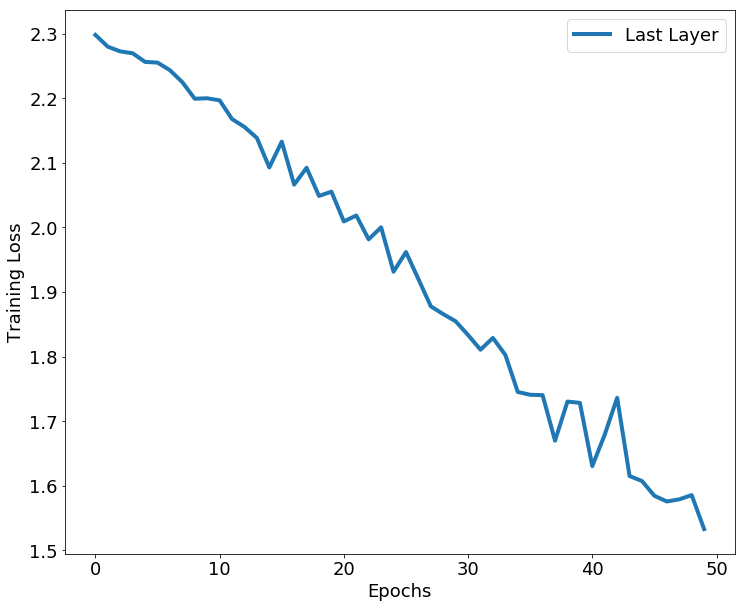

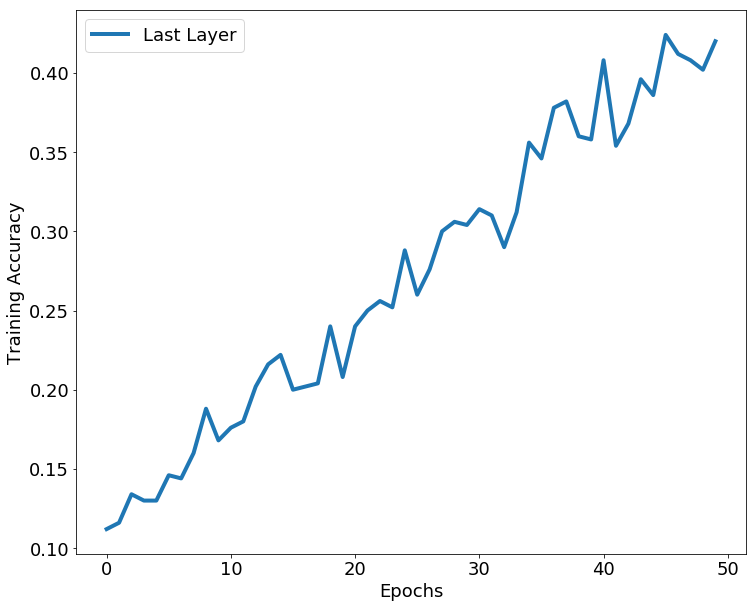

In [16]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

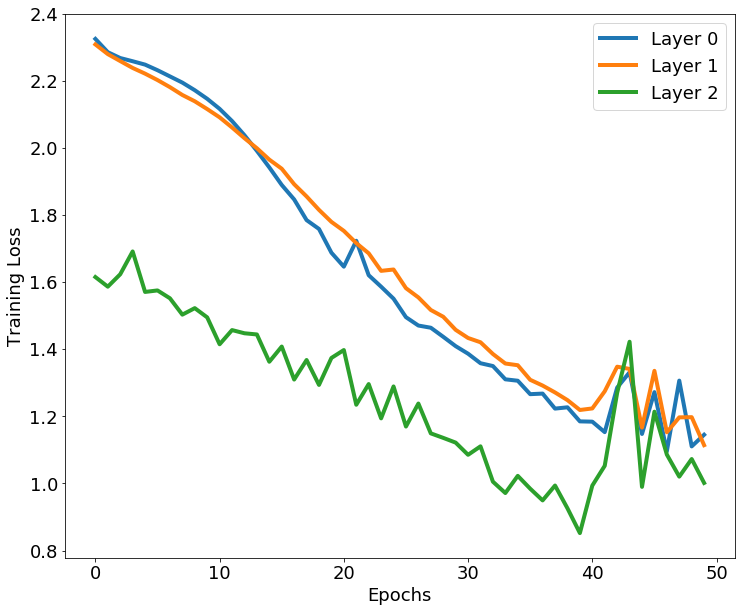

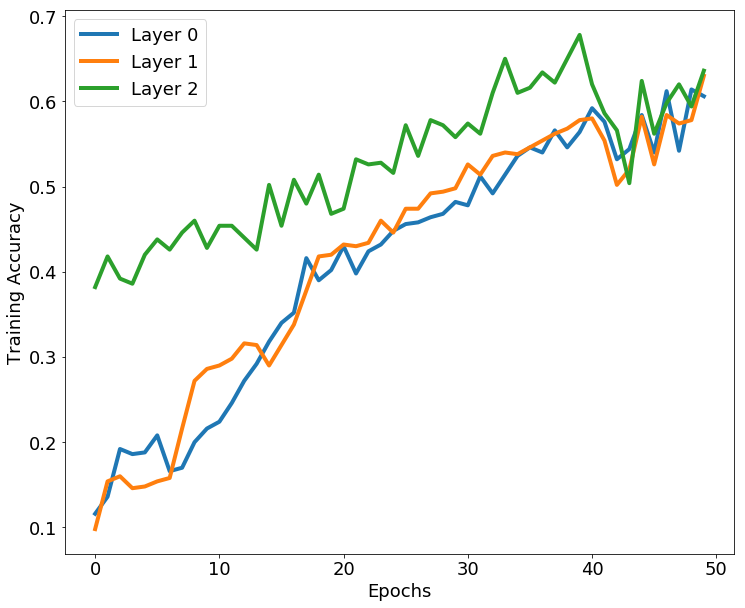

In [17]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Run test suite and visualize

In [18]:
#set network to inference mode
branchyNet.testing()
branchyNet.verbose = False
if cuda.available:
    branchyNet.to_gpu()
g_baseacc, g_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
g_basediff = (g_basediff / float(len(y_test))) * 1000.

#branchyNet.to_cpu()
c_baseacc, c_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
c_basediff = (c_basediff / float(len(y_test))) * 1000.

In [19]:
# Specify thresholds
thresholds = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1., 5., 10.]

In [20]:
#GPU
if cuda.available:
    branchyNet.to_gpu()
g_ts, g_accs, g_diffs, g_exits = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                    batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
g_diffs *= 1000.

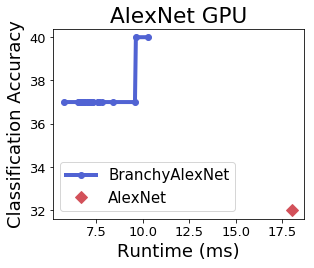

In [21]:
visualize.plot_line_tradeoff(g_accs, g_diffs, g_ts, g_exits, g_baseacc, g_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyAlexNet', orig_label='AlexNet', xlabel='Runtime (ms)', 
                             title='AlexNet GPU', output_path='_figs/alexnet_gpu.pdf')

In [22]:
#CPU
branchyNet.to_cpu()
c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                     batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
c_diffs *= 1000.

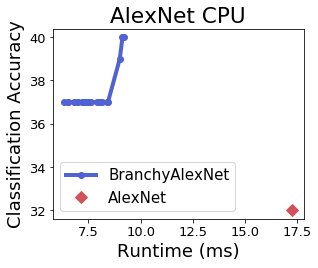

In [23]:
visualize.plot_line_tradeoff(c_accs, c_diffs, c_ts, c_exits, c_baseacc, c_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyAlexNet', orig_label='AlexNet', xlabel='Runtime (ms)',
                             title='AlexNet CPU', output_path='_figs/alexnet_cpu.pdf')

In [24]:
reload(utils)
print 'CPU Results:'
utils.branchy_table_results('AlexNet', c_baseacc, c_basediff, c_accs, c_diffs, c_exits, c_ts)

print '\n\n'

print 'GPU Results:'
utils.branchy_table_results('AlexNet', g_baseacc, g_basediff, g_accs, c_diffs, g_exits, g_ts)

CPU Results:
        Network        Acc.(%)       Time(ms)           Gain      Thrshld.T        Exit(%)
        AlexNet          32.00          17.28              -              -              -
      B-AlexNet          31.00          17.52           0.99{0.0001, 0.0001}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          18.47           0.94{0.0001, 0.001}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          16.83           1.03{0.0001, 0.005}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          16.19           1.07 {0.0001, 0.01}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          20.33           0.85 {0.0001, 0.05}{0.0, 1.0, 99.0}
      B-AlexNet          31.00          17.55           0.98  {0.0001, 0.1}{0.0, 1.0, 99.0}
      B-AlexNet          32.00          17.63           0.98  {0.0001, 0.5}{0.0, 7.000000000000001, 93.0}
      B-AlexNet          34.00          16.31           1.06 {0.0001, 0.75}{0.0, 15.0, 85.0}
      B-AlexNet          35.00          17.45    

Save model/data

In [25]:
import dill
branchyNet.to_cpu()
with open("_models/alexnet_cifar10.bn", "wb") as f:
    dill.dump(branchyNet, f)
with open("_models/alexnet_cifar10_gpu_results.pkl", "wb") as f:
    dill.dump({'accs': g_accs, 'rt': g_diffs, 'exits': g_exits, 'ts': g_ts, 'baseacc': g_baseacc, 'basediff': g_basediff}, f)
with open("_models/alexnet_cifar10_cpu_results.pkl", "wb") as f:
    dill.dump({'accs': c_accs, 'rt': c_diffs, 'exits': c_exits, 'ts': c_ts, 'baseacc': c_baseacc, 'basediff': c_basediff}, f)

In [26]:
import dill
with open("_models/lenet_mnist_gpu_results.pkl", "rb") as f:
    gpu_res = dill.load(f)
with open("_models/lenet_mnist_cpu_results.pkl", "rb") as f:
    cpu_res = dill.load(f)